# Random Forest 1 Year Mortality 

* Random forest classifier implemented using scikit-learn
* 5-Fod Cross validation using a grid of values for: Number of trees, Maximum deptrh of trees, Min Samples before split node, Number of features to split, among others.
* The parameter grid was reduced to the optimal after finding the best estimator.
* Model is evaluated and compared against the other models using accuracy, confusion metrics, ROC, PRC

In [29]:
import sklearn
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt

%run ImportPlotFunctions.ipynb

## Read train and test data, split by columns

In [1]:
%run LoadData1Y.ipynb

Loaded 1 Year Train Sample:
X_train shape: (38857, 106)
y shape: (38857,)
Loaded 1 Year Test Sample:
X_test shape: (19139, 106)
y_test shape: (19139,)


## Set parameter vectors to compute the optimized parameters for Random Forest model.

In [2]:
param_grid = {
    #The generic form to test optimized parameter is:
    #'n_estimators' : [int(i) for i in np.linsapce(100,2000,num = 10)],
    # and below are chosen values for parameters
    'n_estimators' : [400],  
    'max_depth' : [30],
    'bootstrap': ['True'],
    'max_features' : ['auto'],
    'oob_score' : ['True'] ,
    'min_samples_leaf' : [1], 
    'min_samples_split' : [3]
}

In [6]:
clf = ensemble.RandomForestClassifier(
    n_estimators = 2,
    bootstrap = True,
    max_depth = None
)

In [8]:
model = model_selection.GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    n_jobs = -1,
    verbose = 3,
    scoring = 'accuracy',
    cv = 5
).fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


## Accuracy score

In [30]:
print("Score: ", model.best_estimator_.score(X_test, y_test))
y_score = model.best_estimator_.predict_proba(X_test)[:,1]
y_pred = model.best_estimator_.predict(X_test)

Score:  0.8839019802497519


## Plot importance of features

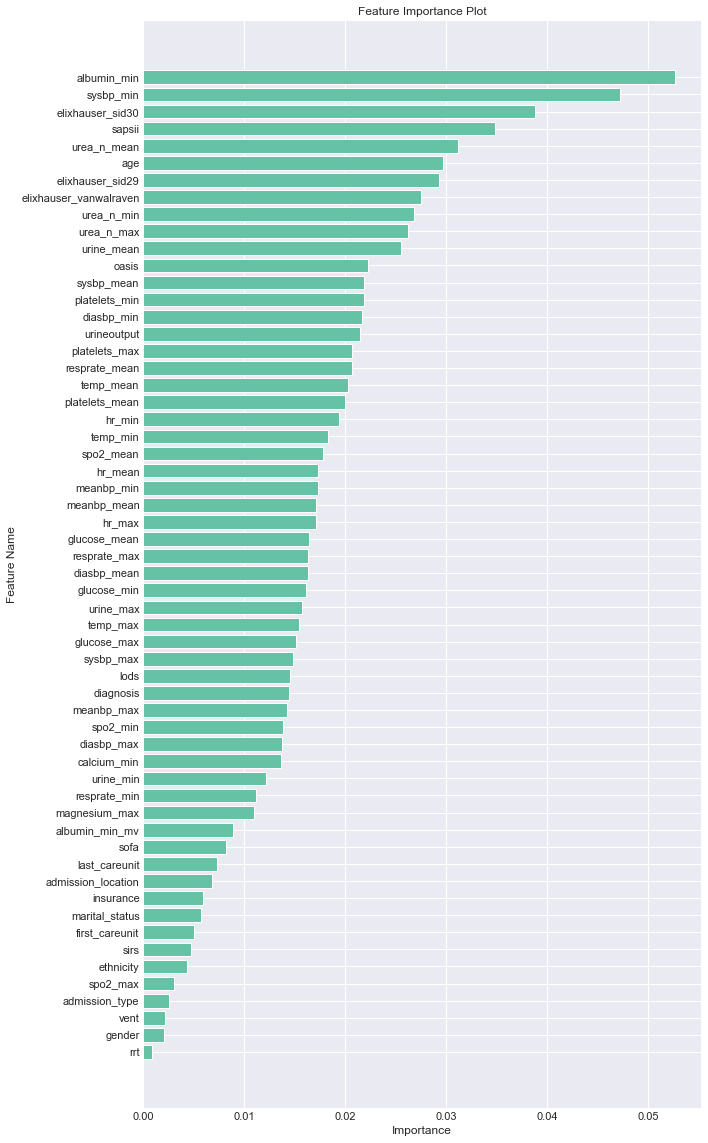

In [26]:
names = X_test.columns.tolist()
values = model.best_estimator_.feature_importances_
feature_importance_bar(names, values, drop_botn=48, figsize=(10, 20))

## Plot ROC curve

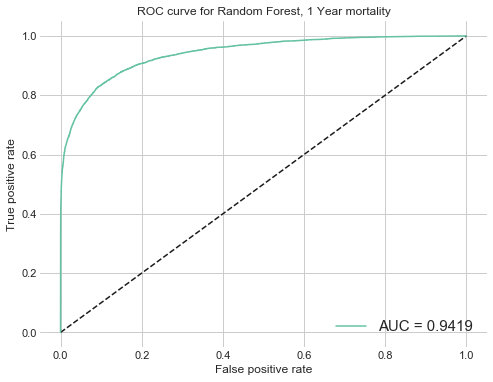

In [27]:
plot_ROC(y_test, y_score, title='ROC curve for Random Forest, 1 Year mortality')

## Confusion matrix

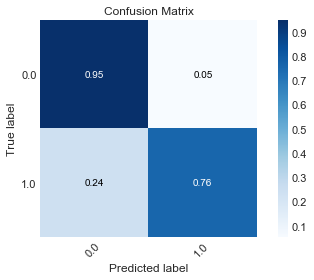

In [14]:
plot_cm(y_test, y_score)

## F1 Score

In [31]:
f1_score = metrics.f1_score(y_test,y_pred)
f1_score

0.8147715905301767

## PRC

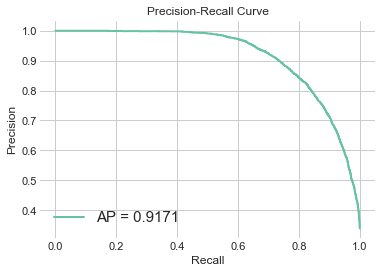

In [15]:
plot_PRC(y_test, y_score)